In [2]:
import numpy  as np
import pandas as pd

import sklearn
from   sklearn.datasets import load_iris, load_breast_cancer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer

from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score, cross_validate, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

import seaborn as sns

import missingno as msno

#unsupervised learning
from sklearn.cluster import KMeans

## cluster(군집화)
- 데이터 포인트들을 별개의 군집으로 그룹화하는 것을 의미함.
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 하는 알고리즘

In [6]:
cluster_frm = pd.DataFrame(columns=('x','y'))
cluster_frm.loc[0]=[7,1]
cluster_frm.loc[1]=[2,1]
cluster_frm.loc[2]=[4,2]
cluster_frm.loc[3]=[9,4]
cluster_frm.loc[4]=[10,5]
cluster_frm.loc[5]=[10,6]
cluster_frm.loc[6]=[11,5]
cluster_frm.loc[7]=[11,6]
cluster_frm.loc[8]=[15,13]
cluster_frm.loc[9]=[15,2]
cluster_frm.loc[10]=[16,6]
cluster_frm.loc[11]=[16,1]
cluster_frm

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,13
9,15,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


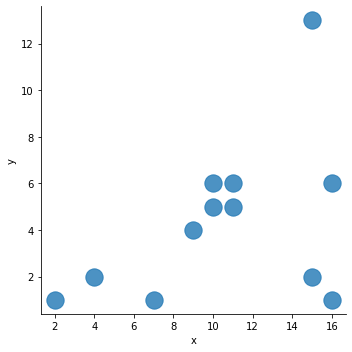

In [9]:
sns.lmplot('x','y',
          data=cluster_frm,
          fit_reg = False,
          scatter_kws={'s':300})
plt.show()
plt.close()
                       

In [10]:
kmeas = KMeans(n_clusters = 3)
kmeas.fit(cluster_frm)

KMeans(n_clusters=3)

In [12]:
print('type - ', type(kmeas))
print(kmeas.labels_)

type -  <class 'sklearn.cluster._kmeans.KMeans'>
[2 2 2 1 1 1 1 1 0 1 1 1]


In [13]:
cluster_frm['cluster_id']=kmeas.labels_
cluster_frm

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,1
4,10,5,1
5,10,6,1
6,11,5,1
7,11,6,1
8,15,13,0
9,15,2,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


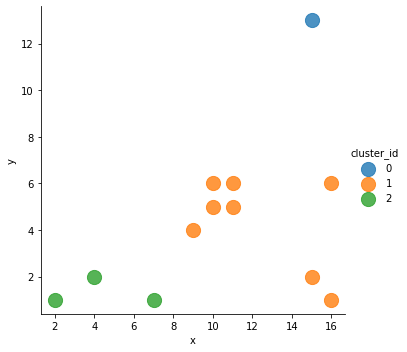

In [20]:
sns.lmplot('x','y',
          data=cluster_frm,
          fit_reg = False,
          scatter_kws={'s':200},
          hue='cluster_id')
plt.show()
plt.close()

In [21]:
from sklearn.datasets import make_blobs
print('분류용 가상 데이터 생성 - ')

X, y = make_blobs(n_samples=300, # 샘플 갯수를 300개 찍어 달라
                 n_features=2,
                 centers=3, # cluster_id 수
                 random_state=100) 

분류용 가상 데이터 생성 - 


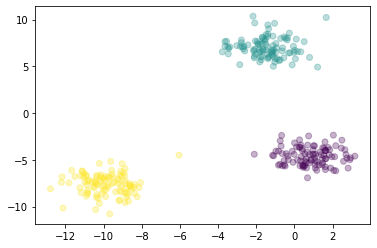

In [26]:
plt.scatter(X[:,0],X[:,1], marker='o', alpha=0.3, c=y) #y는 클러스터아이디 이므로 컬러를 바꿔줌
plt.show()
plt.close()

In [27]:
feature, label = make_blobs(random_state=100)

In [28]:
feature

array([[ 3.36818459e-01, -3.40287961e+00],
       [-9.48324266e+00, -8.66266052e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-1.00318241e+01, -5.57834393e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [-8.12962929e+00, -7.05554321e+00],
       [-7.30825786e-01,  7.32375552e+00],
       [-1.84142532e+00,  6.20630467e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [-8.73509589e+00, -5.49090535e+00],
       [ 1.84941962e+00, -3.91839346e+00],
       [-9.15256069e+00, -9.17805648e+00],
       [-3.21429939e+00,  5.75926164e+00],
       [ 2.84503785e-01, -3.61576523e+00],
       [-9.29074849e-01,  5.79099955e+00],
       [ 3.66925242e-01,  6.51861930e+00],
       [ 1.59909918e+00, -3.07105617e+00],
       [-9.71270568e+00, -7.91707651e+00],
       [-1.00804044e+01, -6.55135324e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 2.48708050e+00, -2.89100712e+00],
       [ 5.87148931e-03, -3.18314256e+00],
       [ 1.61854360e+00, -4.88855923e+00],
       [-9.

In [29]:
label

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(feature)

KMeans(n_clusters=3)

In [31]:
kmeans.labels_

array([2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2])

In [32]:
kmeans.predict(feature)

array([2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2])

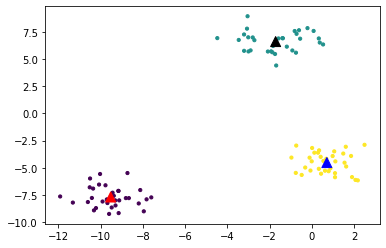

In [37]:
plt.scatter(feature[:,0],feature[:,1],
           marker='o',
           c=kmeans.labels_,
           s=10)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker='^',
           c=['r', 'k', 'b'],
           s=100)

plt.show()
plt.close()

In [35]:
kmeans.cluster_centers_
# 군집의 갯수가 3개 이므로 그들의 센터를 좌표로 지정

array([[-9.52981151, -7.69781936],
       [-1.72134158,  6.61045437],
       [ 0.70353328, -4.52767455]])

In [40]:
iris = load_iris()
iris_frm=pd.DataFrame(data=iris.data,
                     columns=iris.feature_names)
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
iris_kmeans = KMeans(n_clusters = 3,
                     verbose = 1,
                     init = 'k-means++',
                     max_iter = 300) # 최적 위치를 잡을때 까지 300번의 기회를 줌

iris_kmeans

iris_kmeans.fit(iris_frm)

Initialization complete
Iteration 0, inertia 96.87
Iteration 1, inertia 79.17813115527622
Iteration 2, inertia 78.92130972222225
Iteration 3, inertia 78.85566582597727
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 95.95
Iteration 1, inertia 83.55990208333336
Iteration 2, inertia 82.4716868394502
Iteration 3, inertia 81.54360278471792
Iteration 4, inertia 80.80637599999999
Iteration 5, inertia 79.87357983461304
Iteration 6, inertia 79.34436414532675
Iteration 7, inertia 78.92130972222225
Iteration 8, inertia 78.85566582597727
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 112.84000000000007
Iteration 1, inertia 79.20522441958194
Iteration 2, inertia 78.851441426146
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 312.55
Iteration 1, inertia 92.94490426267551
Iteration 2, inertia 82.60809228354064
Iteration 3, inertia 79.39432885317473
Iteration 4, inertia 78

KMeans(n_clusters=3, verbose=1)

In [44]:
iris_kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [45]:
iris_kmeans.predict(iris_frm)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [46]:
iris_frm['cid'] = iris_kmeans.labels_
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [90]:
iris_frm['target'] = iris.target
iris_frm
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [106]:
print('cid를 기준으로 sepal length의 빈도를 확인 한다면? -')
# iris_frm.groupby(['cid', 'target'])['sepal length (cm)'].count()
iris_frm.groupby(['cid', 'target']).count()

cid를 기준으로 sepal length의 빈도를 확인 한다면? -


sepal length (cm)  sepal width (cm)  petal length (cm)  \
cid target                                                           
0   1                      48                48                 48   
    2                      14                14                 14   
1   0                      50                50                 50   
2   1                       2                 2                  2   
    2                      36                36                 36   

            petal width (cm)  pca_x  pca_y  std_pca_x  std_pca_y  
cid target                                                        
0   1                     48     48     48         48         48  
    2                     14     14     14         14         14  
1   0                     50     50     50         50         50  
2   1                      2      2      2          2          2  
    2                     36     36     36         36         36

## 주성분분석(principal Components Analysis)
- 고차원의 데이터를 저차원의 데이터로 차원을 축소시키는 방법
- 이유? 모든 피처가 결과에 영향을 미치는건 아니기 때문에
- 시각화를 위해서는 2차원의 그래프로 바꿔야함
- 차원 축소의 이점 : 시각화, 노이즈 제거, 메모리 절약,모델의 성능을 개선

In [50]:
from sklearn.decomposition import PCA
iris_pca = PCA(n_components=2) # 4개를 2개로 줄이겠다.

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [53]:
iris_frm['pca_x']=iris_pca_trans[:,0]
iris_frm['pca_y']=iris_pca_trans[:,1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


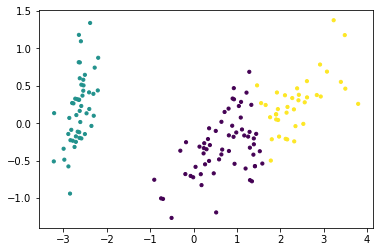

In [54]:
plt.scatter(iris_frm['pca_x'],iris_frm['pca_y'],
           marker='o',
           c=iris_frm['cid'],
           s=10)
plt.show()
plt.close()

In [55]:
print('차원축소시 피처의 유닛이 다를 경우 - 스케일링이 필요하다')
print()

차원축소시 피처의 유닛이 다를 경우 - 스케일링이 필요하다



In [56]:
def feature_scaling(method='None', input_data=None) :
    if method == 'standard' :
        return StandardScaler().fit_transform(input_data)
    if method == 'minmax' :
        return MinMaxScaler().fit_transform(input_data)

In [60]:
std_scaler = feature_scaling(method='standard' , 
                input_data = iris_frm.iloc[ :  , : 4])
std_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [61]:
iris_pca = PCA(n_components = 2) 

iris_pca_trans = iris_pca.fit_transform(std_scaler)
iris_pca_trans 

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [62]:
iris_frm['std_pca_x'] = iris_pca_trans[ : , 0]
iris_frm['std_pca_y'] = iris_pca_trans[ : , 1]
iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cid,target,pca_x,pca_y,std_pca_x,std_pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,1.870503,0.386966
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,1.372788,1.011254


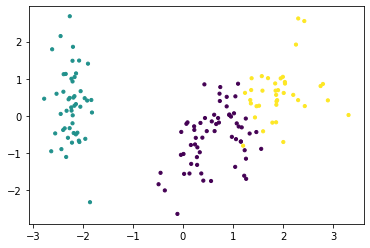

In [64]:
std_iris_kmeans = KMeans(n_clusters=3)
std_iris_kmeans.fit(iris_frm.iloc[:,-2:])


KMeans(n_clusters=3)

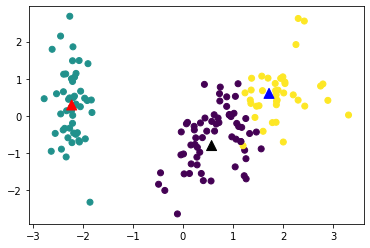

In [65]:
plt.scatter(iris_frm['std_pca_x'],iris_frm['std_pca_y'],
           c=iris_frm['cid'])

plt.scatter(std_iris_kmeans.cluster_centers_[:,0],std_iris_kmeans.cluster_centers_[:,1],
           marker='^',
           c=['r', 'k', 'b'],
           s=100)

plt.show()
plt.close()

## KMeans [실습]
- wholesale customer(도메인 고객)

In [66]:
customer_frm = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
customer_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [67]:
customer_frm.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [68]:
customer_frm.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [71]:
customer_frm['Channel'].unique()

array([2, 1], dtype=int64)

In [72]:
customer_frm['Region'].unique()

array([3, 1, 2], dtype=int64)

In [73]:
X = customer_frm.iloc[:,:]
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [74]:
scaler_X = feature_scaling(method='standard', input_data=X)
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [75]:
print("군집모형 - ")
kmeans=KMeans(n_clusters=5)
kmeans.fit(scaler_X)
print("군집예측 - ")
print(kmeans.labels_)
print()
print("군집 중앙 위치 -")
print(kmeans.cluster_centers_)

군집모형 - 
군집예측 - 
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 1 1 1 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 2 1 3 1
 1 1 1 0 0 1 1 1 0 1 1 4 0 4 4 0 0 4 4 4 0 4 4 4 0 4 2 4 4 0 4 0 4 0 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 2 4 4 4 4 4 4 4
 4 4 4 4 4 0 4 0 4 0 4 4 4 4 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 4 0
 4 0 0 4 0 0 0 0 0 0 0 4 4 0 4 4 0 4 4 0 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4
 2 4 0 4 4 4 4 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]

군집 중앙 위치 -
[[ 1.44865163e+00  1.69928497e-01 -3.06362835e-01  4.17500207e-01
   6.51879518

In [76]:
X['cid']=kmeans.labels_

In [77]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cid
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


## 고등학교 진학률 데이터를 활용하여 속성이 비슷한 중학교끼리 클러스터 [실습]
- 데이터 인코딩, 지도 시각화(위도, 경도, folium)

In [78]:
school_frm = pd.read_excel('C:/Users/JYP/data/middle_shcool_graduates_report.xlsx')
school_frm

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,...,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,...,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,...,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,...,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,...,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,...,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,강남구,국립국악중학교,9,국립,주간,9,91,0.060,0.000,...,0.000,0.940,0.000,0.000,0.000,0.000,0,0.000,37.476381,127.051355
411,411,금천구,국립전통예술중학교,9,국립,주간,14,42,0.107,0.000,...,0.000,0.875,0.000,0.000,0.000,0.000,0,0.018,37.446354,126.906424
412,412,광진구,선화예술학교,9,사립,주간,33,241,0.102,0.000,...,0.000,0.861,0.000,0.000,0.000,0.000,0,0.036,37.549642,127.087737
413,413,중구,예원학교,9,사립,주간,31,258,0.170,0.000,...,0.000,0.751,0.000,0.000,0.000,0.048,0,0.031,37.566951,126.971553


In [79]:
school_frm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [80]:
school_frm.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [81]:
import folium

In [83]:
school_map = folium.Map(location=[37.56582401101429, 126.97685924423115],
                       zoom_start =12,
                       tiles='Stamen Toner')
for name, lat, lng in zip(school_frm['학교명'], school_frm['위도'], school_frm['경도']):
    folium.Marker(
        [lat, lng],
        popup = name,
        icon = folium.Icon(color = 'red')
    ).add_to(school_map)
school_map

### 진행절차
#### step01. 데이터 전처리 - (지역, 코드 , 유형, 주야)
#### step02. 군집모형생성 - 분석에 사용할 피처는 과학고, 외고국제고, 자사고 진학률
#### step03. 표준화
#### step04. 모형 객체 생성
#### step05. 모형 학습
#### step06. 예측
#### step07. 예측 결과를 데이터 프레임에 추가
#### step08. 클러스터 값으로 그룹화, 그룹별 내용 출력
#### step09. 지도 그래프 시각화

In [120]:
print('step01. -')
school = school_frm.iloc[:,:]

step01. -


In [121]:
label_encoder = LabelEncoder()
school['지역'] = label_encoder.fit_transform(school['지역'])
school['코드'] = label_encoder.fit_transform(school['코드'])
school['유형'] = label_encoder.fit_transform(school['유형'])
school['주야'] = label_encoder.fit_transform(school['주야'])
school.head()

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,16,서울대학교사범대학부설중학교,0,1,0,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,22,서울대학교사범대학부설여자중학교,0,1,0,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,0,개원중학교,0,0,0,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,0,개포중학교,0,0,0,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,14,경원중학교,0,0,0,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [124]:
print('step02. -')
school.drop(['Unnamed: 0'], axis=1, inplace=True)
school

step02. -


KeyError: "['Unnamed: 0'] not found in axis"

In [125]:
school.columns

Index(['지역', '학교명', '코드', '유형', '주야', '남학생수', '여학생수', '일반고', '특성화고', '과학고',
       '외고_국제고', '예고_체고', '마이스터고', '자사고', '자공고', '기타진학', '취업', '미상', '위도',
       '경도'],
      dtype='object')

In [133]:
X=school.loc[:,['과학고', '외고_국제고', '자사고']]
X

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282
...,...,...,...
410,0.000,0.000,0.000
411,0.000,0.000,0.000
412,0.000,0.000,0.000
413,0.000,0.000,0.000


In [134]:
scaler_X = feature_scaling(method='standard', input_data=X)
scaler_X


array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

In [135]:
print("군집모형 - ")
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaler_X)
print("군집예측 - ")
print(kmeans.labels_)
print()
print("군집 중앙 위치 -")
print(kmeans.cluster_centers_)

군집모형 - 
군집예측 - 
[1 0 0 0 1 2 1 1 1 0 1 0 0 0 1 0 1 2 1 1 2 1 0 0 0 1 1 1 2 2 1 1 0 0 2 2 0
 0 0 1 1 1 1 0 2 1 2 2 0 0 0 0 2 1 2 2 2 1 2 2 0 2 2 2 1 2 2 2 0 0 2 0 0 0
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 1 2 0 1 0 2 2 0 2 2 0 2 0 0 2 2 2 2 2 2 0 1
 2 1 1 0 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0
 2 0 1 1 2 2 2 2 2 1 0 0 2 2 2 2 0 2 2 0 0 2 0 2 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 1 1 2 2 2 2 0 1 0 0 1 2 2 2 2 2 2 2 0 0 2 0 2 0 0 2 2 2 0 0 2 0 0
 0 2 0 0 0 0 1 2 2 2 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 0 2 2 0 2 2
 2 2 0 1 2 0 1 2 0 2 2 2 0 2 2 2 1 0 0 1 2 2 2 2 2 2 2 2 1 2 2 0 0 2 1 0 2
 0 0 2 2 0 2 0 2 2 2 2 0 2 0 2 0 0 2 0 2 0 0 2 0 1 0 0 2 0 0 2 0 0 0 0 2 2
 2 0 2 0 2 0 2 2 2 2 0 2 2 1 2 2 2 2 0 1 2 2 2 2 0 1 1 1 2 0 0 0 0 1 2 0 1
 0 0 2 0 2 0 0 2 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0]

군집 중앙 위치 -
[[-0.06804783  0.83068758  0.16107937]
 [ 1.8980411   0.42063499  1.487673  ]
 [-0.39692239 -0.6067018  -0.4426131 ]]


In [ ]:
school_pca = PCA(n_components=2) # 4개를 2개로 줄이겠다.

iris_pca_trans = iris_pca.fit_transform(iris.data)
iris_pca_trans